In [1]:
%load_ext autoreload
%autoreload 2

from netty.netty import Netty
import img_utils as im
import numpy as np

Using TensorFlow backend.


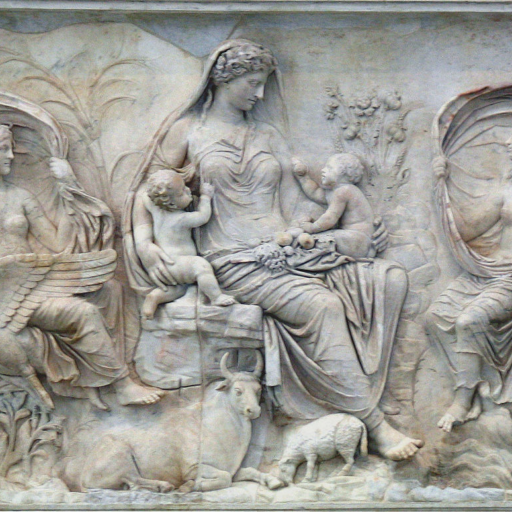

In [2]:
img2 = im.load("data/sta.jpg")
img2 = im.size(img2,size=(512,512))
# img2 = set_color(img2,img,True,False)
# img2 = histmatch(img2,img)
im.show(img2)

In [16]:
net = Netty()
net.clear()

# net.args["style"] = False
net.args["content"] = False

net.args["style_scale"] = 1
net.args["content_w"] = 1e-5
net.args["style_layers"] = [1,4,7]

net.args["octaves"] = 1
net.args["variational_w"] = 1e-6
net.args["variational_pow"] = 1.25
net.args["iters"] = 10

net.args["patch_window"] = 512



net.args["mrf"] = False
net.args["mrf_w"] = 1
net.args["mrf_layers"] = [7]
net.args["mrf_patch_size"] = 1
net.args["mrf_patch_stride"] = 1


net.args["size"] = np.array([1024,1024])
net.args["x0"] = "noise"
# net.args["x0"] = x

net.set_module("style", img2)
# net.set_module("content", img2)

net.build()
net.setup()

x = net.render()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 1024, 1024, 3 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (1, 512, 512, 3)     0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (1, 512, 512, 3)     0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_4 (Lambda)               (1, 512, 4, 3)       0           input_4[0][0]                    
__________________________________________________________________________________________________
lambda_5 (

Render begins


ResourceExhaustedError: OOM when allocating tensor with shape[1,64,510,1020] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: model_6/concatenate_6/concat = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32, _class=["loc:@gradients/model_6/concatenate_6/concat_grad/Slice_1"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](model_6/conv2d_2/Relu, model_6/conv2d_2_1/Relu, model_6/concatenate_5/concat-2-LayoutOptimizer)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: lambda_31/ExpandDims/_433 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1239_lambda_31/ExpandDims", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [9]:
f2=net.modules["content"].predict(np.array([img2]))

(55, 55, 512)
(55, 55, 512)


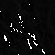

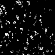

In [10]:
print(f3[0].shape)
print(f2[0].shape)


im.show(f3[0][...,3])
im.show(f2[0][...,3])


# print(f[0][...,3])

In [ ]:
net.modules